In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors


print("Done and ready for project")


Done and ready for project


In [5]:
df_songs=pd.read_csv("C:\\Users\\ENG Mutua Brian\\Downloads\\Last.fm_data.csv")
df_songs

,Unnamed: 0,Username,Artist,Track,Album,Date,Time
0,0,Babs_05,Isobel Campbell,The Circus Is Leaving Town,Ballad of the Broken Seas,31 Jan 2021,23:36
1,1,Babs_05,Isobel Campbell,Dusty Wreath,Ballad of the Broken Seas,31 Jan 2021,23:32
2,2,Babs_05,Isobel Campbell,Honey Child What Can I Do?,Ballad of the Broken Seas,31 Jan 2021,23:28
3,3,Babs_05,Isobel Campbell,It's Hard To Kill A Bad Thing,Ballad of the Broken Seas,31 Jan 2021,23:25
4,4,Babs_05,Isobel Campbell,Saturday's Gone,Ballad of the Broken Seas,31 Jan 2021,23:21
...,...,...,...,...,...,...,...
166148,265624,Orlenay,Kelly Lee Owens,Arpeggi,Inner Song,30 Jan 2021,18:30
166149,265625,Orlenay,Caterina Barbieri,Bow of Perception,Ecstatic Computation,30 Jan 2021,18:19
166150,265626,Orlenay,Caterina Barbieri,Pinnacles of You,Ecstatic Computation,30 Jan 2021,18:13
166151,265627,Orlenay,Caterina Barbieri,Arrows of Time,Ecstatic Computation,30 Jan 2021,18:08


In [18]:
df_songs.head()

,Unnamed: 0,Username,Artist,Track,Album,Date,Time
0,0,Babs_05,Isobel Campbell,The Circus Is Leaving Town,Ballad of the Broken Seas,31 Jan 2021,23:36
1,1,Babs_05,Isobel Campbell,Dusty Wreath,Ballad of the Broken Seas,31 Jan 2021,23:32
2,2,Babs_05,Isobel Campbell,Honey Child What Can I Do?,Ballad of the Broken Seas,31 Jan 2021,23:28
3,3,Babs_05,Isobel Campbell,It's Hard To Kill A Bad Thing,Ballad of the Broken Seas,31 Jan 2021,23:25
4,4,Babs_05,Isobel Campbell,Saturday's Gone,Ballad of the Broken Seas,31 Jan 2021,23:21


In [20]:
df_songs.columns

Index(['Unnamed: 0', 'Username', 'Artist', 'Track', 'Album', 'Date', 'Time'], dtype='object')

In [22]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166153 entries, 0 to 166152
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  166153 non-null  int64 
 1   Username    166153 non-null  object
 2   Artist      166153 non-null  object
 3   Track       166153 non-null  object
 4   Album       166141 non-null  object
 5   Date        166153 non-null  object
 6   Time        166153 non-null  object
dtypes: int64(1), object(6)
memory usage: 8.9+ MB


In [24]:
df_songs.describe()

,Unnamed: 0
count,166153.000000
mean,123210.070682
std,80248.930071
min,0.000000
25%,52401.000000
50%,117509.000000
75%,191651.000000
max,265628.000000


In [28]:
missing_values= df_songs.isnull().sum()
missing_values

Unnamed: 0     0
Username       0
Artist         0
Track          0
Album         12
Date           0
Time           0
dtype: int64

In [67]:
duplicates=df_songs.duplicated().sum()
duplicates

0

In [12]:
most_listened_artist = df_songs.groupby('Username')['Artist'].agg(lambda x: x.value_counts().idxmax())
most_listened_count = df_songs.groupby('Username')['Artist'].agg(lambda x: x.value_counts().max())

# Combine the most listened artist and their count in a DataFrame
most_listened_df = pd.DataFrame({'Most Listened Artist': most_listened_artist, 'Times Played': most_listened_count})
most_listened_df



,Most Listened Artist,Times Played
Username,,
Babs_05,Sophie,367
Knapster01,Sophie,196
Orlenay,PJ Harvey,74
eartle,Madlib,142
franhale,Sophie,292
isaac,Foo Fighters,49
jajo,Madlib,41
jonocole,Sophie,123
lobsterclaw,Madlib,41


In [9]:
 df_songs['Datetime'] = pd.to_datetime(df_songs['Date'] + '' + df_songs['Time'])
 df_songs

,Unnamed: 0,Username,Artist,Track,Album,Date,Time,Datetime
0,0,Babs_05,Isobel Campbell,The Circus Is Leaving Town,Ballad of the Broken Seas,31 Jan 2021,23:36,2021-01-31 23:36:00
1,1,Babs_05,Isobel Campbell,Dusty Wreath,Ballad of the Broken Seas,31 Jan 2021,23:32,2021-01-31 23:32:00
2,2,Babs_05,Isobel Campbell,Honey Child What Can I Do?,Ballad of the Broken Seas,31 Jan 2021,23:28,2021-01-31 23:28:00
3,3,Babs_05,Isobel Campbell,It's Hard To Kill A Bad Thing,Ballad of the Broken Seas,31 Jan 2021,23:25,2021-01-31 23:25:00
4,4,Babs_05,Isobel Campbell,Saturday's Gone,Ballad of the Broken Seas,31 Jan 2021,23:21,2021-01-31 23:21:00
...,...,...,...,...,...,...,...,...
166148,265624,Orlenay,Kelly Lee Owens,Arpeggi,Inner Song,30 Jan 2021,18:30,2021-01-30 18:30:00
166149,265625,Orlenay,Caterina Barbieri,Bow of Perception,Ecstatic Computation,30 Jan 2021,18:19,2021-01-30 18:19:00
166150,265626,Orlenay,Caterina Barbieri,Pinnacles of You,Ecstatic Computation,30 Jan 2021,18:13,2021-01-30 18:13:00
166151,265627,Orlenay,Caterina Barbieri,Arrows of Time,Ecstatic Computation,30 Jan 2021,18:08,2021-01-30 18:08:00


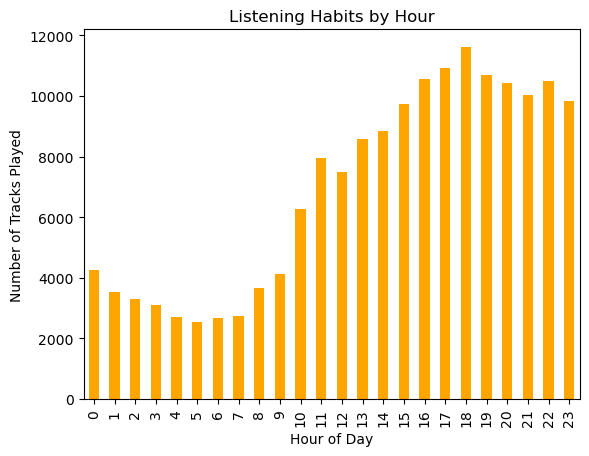

In [19]:

df_songs['Hour'] = df_songs['Datetime'].dt.hour
df_songs['Hour'].value_counts().sort_index().plot(kind='bar', color= 'orange')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tracks Played')
plt.title('Listening Habits by Hour')
plt.show()


C:\Users\ENG Mutua Brian\AppData\Local\Temp\ipykernel_7892\2487223336.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_of_month_counts.index, y=day_of_month_counts.values, palette='viridis')


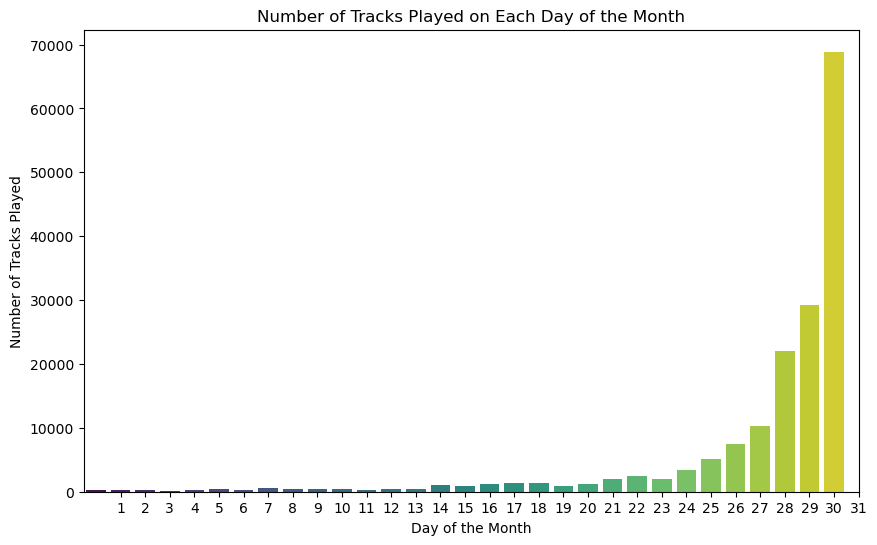

In [23]:
df_songs['DayOfMonth'] = df_songs['Datetime'].dt.day
day_of_month_counts = df_songs['DayOfMonth'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_month_counts.index, y=day_of_month_counts.values, palette='viridis')

plt.xlabel('Day of the Month')
plt.ylabel('Number of Tracks Played')
plt.title('Number of Tracks Played on Each Day of the Month')
plt.xticks(ticks=range(1, 32), labels=range(1, 32))
plt.show()


In [29]:
group= df_songs.groupby("Unnamed: 0")[["Username","Artist","Track", "Album"]].head()
group

,Username,Artist,Track,Album
0,Babs_05,Isobel Campbell,The Circus Is Leaving Town,Ballad of the Broken Seas
1,Babs_05,Isobel Campbell,Dusty Wreath,Ballad of the Broken Seas
2,Babs_05,Isobel Campbell,Honey Child What Can I Do?,Ballad of the Broken Seas
3,Babs_05,Isobel Campbell,It's Hard To Kill A Bad Thing,Ballad of the Broken Seas
4,Babs_05,Isobel Campbell,Saturday's Gone,Ballad of the Broken Seas
...,...,...,...,...
166148,Orlenay,Kelly Lee Owens,Arpeggi,Inner Song
166149,Orlenay,Caterina Barbieri,Bow of Perception,Ecstatic Computation
166150,Orlenay,Caterina Barbieri,Pinnacles of You,Ecstatic Computation
166151,Orlenay,Caterina Barbieri,Arrows of Time,Ecstatic Computation


In [31]:
user_activity = group['Username'].value_counts()
user_activity

Username
Babs_05        33695
franhale       32712
Knapster01     27015
eartle         20966
massdosage     19015
jonocole       17230
Orlenay        10123
isaac           1780
mremond         1452
jajo            1102
lobsterclaw     1063
Name: count, dtype: int64

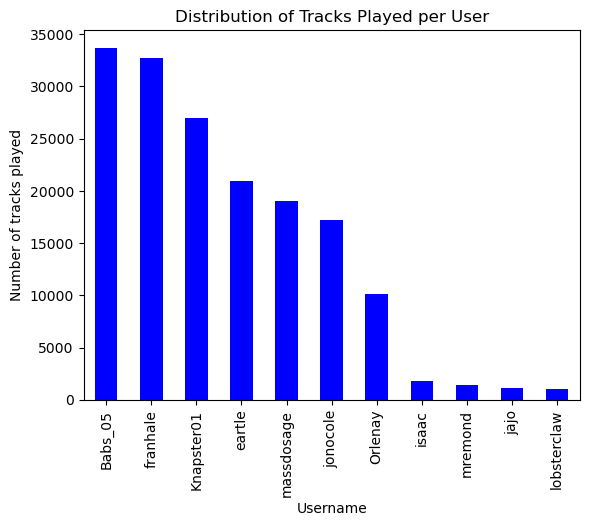

In [37]:
user_activity= user_activity
user_activity.plot(kind='bar', color='blue')
plt.title('Distribution of Tracks Played per User')
plt.xlabel('Username')
plt.ylabel('Number of tracks played')
plt.show()

In [77]:
User_preferences=group["Artist"].value_counts()
User_preferences

Artist
Sophie          1181
Madlib          1074
Bicep            766
Taylor Swift     649
Arlo Parks       593
                ... 
Talos              1
Vybz Kartel        1
LadiPOE            1
Goapele            1
DJ Spooky          1
Name: count, Length: 22823, dtype: int64

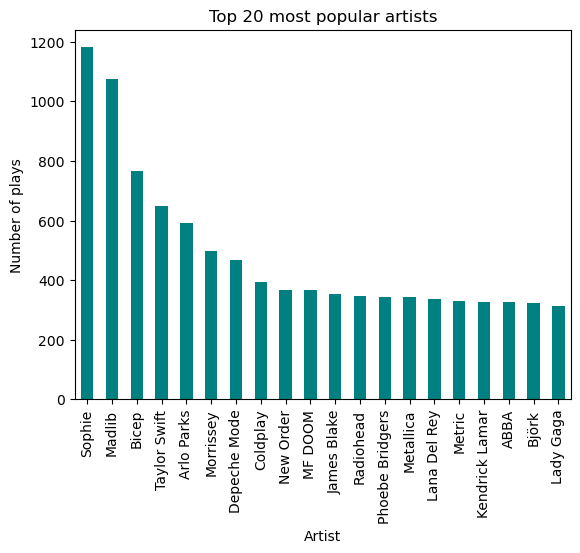

In [85]:
top_artists = User_preferences.head(20)
top_artists.plot(kind='bar', color= 'teal')
plt.title('Top 20 most popular artists')
plt.ylabel('Number of plays')
plt.show()

In [42]:
user_song_count = df_songs.groupby("Username")["Track"].nunique().reset_index()
user_song_count.columns = ["Username", "unique_songs_played"]

user_song_count.sort_values(by="unique_songs_played", ascending=False).head(20)

,Username,unique_songs_played
0,Babs_05,24587
4,franhale,23703
1,Knapster01,20146
3,eartle,16020
9,massdosage,15041
7,jonocole,13359
2,Orlenay,8314
5,isaac,1480
10,mremond,1240
6,jajo,956


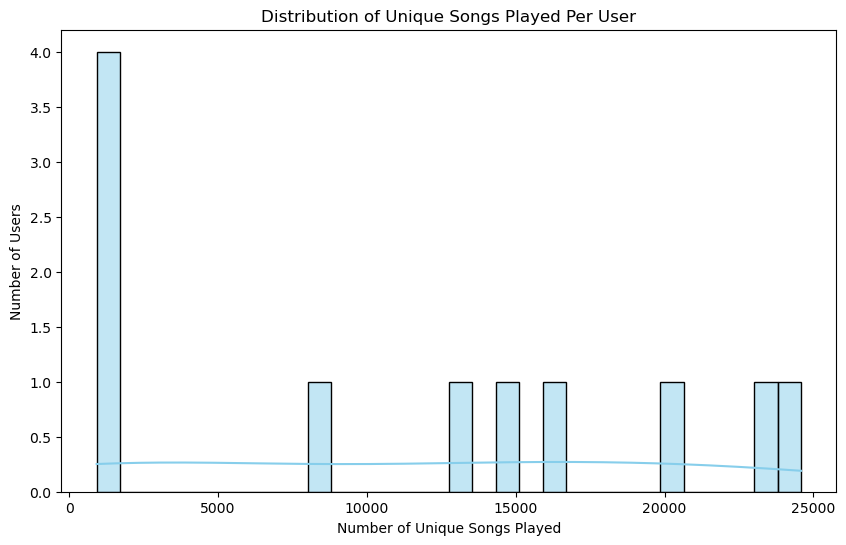

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(user_song_count['unique_songs_played'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Unique Songs Played Per User')
plt.xlabel('Number of Unique Songs Played')
plt.ylabel('Number of Users')
plt.show()

In [30]:
# Calculate how often each user listens to each artist
user_artist_count = df_songs.groupby(['Username', 'Artist']).size().reset_index(name='play_count')

# Pivot to create a user-artist matrix (users as rows, artists as columns)
user_artist_matrix = user_artist_count.pivot(index='Username', columns='Artist', values='play_count').fillna(0)

# Compute the correlation of each artist with every other artist
artist_correlation = user_artist_matrix.corr()

# Display the top correlated artists
print("\n Top Correlated Artists")
artist_correlation.head(110)



 Top Correlated Artists


Artist,!!!,!Akimbo,"""Blue"" Gene Tyranny","""Demons""","""Jesus Christ Superstar"" Apostles - Original Studio Cast","""Puppy Dog Pals"" Cast","""Weird Al"" Yankovic",#1 Garth Brooks Tribute Band,$NOT,$OUDIERE,...,이바다,이진아,장현,태양,트와이스,"프라이머리, 오혁",한상원,현아,ＶＡＣＡＮＴ ＳＴＡＲＥＳ,･ ･－･ ･－ ･･･ ･ －･･
Artist,,,,,,,,,,,,,,,,,,,,,
!!!,1.000000,0.081954,0.682948,-0.218543,0.081954,0.682948,-0.013605,0.410072,0.794101,0.081954,...,-0.325785,-0.325785,-0.218543,0.081954,0.682948,-0.218543,-0.218543,-0.285124,0.081954,0.081954
!Akimbo,0.081954,1.000000,-0.100000,-0.100000,1.000000,-0.100000,-0.239046,0.346410,-0.149071,1.000000,...,-0.149071,-0.149071,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.130466,1.000000,1.000000
"""Blue"" Gene Tyranny",0.682948,-0.100000,1.000000,-0.100000,-0.100000,1.000000,-0.129483,0.346410,0.670820,-0.100000,...,-0.149071,-0.149071,-0.100000,-0.100000,1.000000,-0.100000,-0.100000,-0.130466,-0.100000,-0.100000
"""Demons""",-0.218543,-0.100000,-0.100000,1.000000,-0.100000,-0.100000,0.527893,0.346410,-0.149071,-0.100000,...,0.670820,0.670820,1.000000,-0.100000,-0.100000,1.000000,1.000000,0.945876,-0.100000,-0.100000
"""Jesus Christ Superstar"" Apostles - Original Studio Cast",0.081954,1.000000,-0.100000,-0.100000,1.000000,-0.100000,-0.239046,0.346410,-0.149071,1.000000,...,-0.149071,-0.149071,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.130466,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3rd Force,0.122169,-0.149071,-0.149071,-0.149071,-0.149071,-0.149071,0.705273,-0.430331,0.388889,-0.149071,...,-0.222222,-0.222222,-0.149071,-0.149071,-0.149071,-0.149071,-0.149071,-0.194487,-0.149071,-0.149071
4 Non Blondes,0.084229,-0.235780,-0.036274,0.562244,-0.235780,-0.036274,0.390199,0.701580,-0.202777,-0.235780,...,0.689441,0.689441,0.562244,-0.235780,-0.036274,0.562244,0.562244,0.668464,-0.235780,-0.235780
4 Strings,-0.325785,-0.149071,-0.149071,0.670820,-0.149071,-0.149071,0.296957,0.516398,-0.222222,-0.149071,...,1.000000,1.000000,0.670820,-0.149071,-0.149071,0.670820,0.670820,0.875190,-0.149071,-0.149071


In [33]:
track_popularity = df_songs["Track"].value_counts
track_popularity

<bound method IndexOpsMixin.value_counts of 0             The Circus Is Leaving Town
1                           Dusty Wreath
2             Honey Child What Can I Do?
3          It's Hard To Kill A Bad Thing
4                        Saturday's Gone
                       ...              
166148                           Arpeggi
166149                 Bow of Perception
166150                  Pinnacles of You
166151                    Arrows of Time
166152    Closest approach to your Orbit
Name: Track, Length: 166153, dtype: object>

In [7]:
user_track_matrix = df_songs.pivot_table(index='Username', columns='Track', aggfunc='size', fill_value=0)
print(user_track_matrix)

total_entries = user_track_matrix.size
non_zero_entries = (user_track_matrix > 0).sum().sum()
sparsity = 1 - (non_zero_entries / total_entries)
print(f"Sparsity of User-Track Matrix: {sparsity * 100:.2f}%")

Track        !Ed Buys Houses!  !holyshitohmygod!  "45"  \
Username                                                 
Babs_05                     1                  1     0   
Knapster01                  0                  1     0   
Orlenay                     0                  0     1   
eartle                      0                  0     1   
franhale                    0                  0     0   
isaac                       0                  0     0   
jajo                        0                  0     0   
jonocole                    0                  0     1   
lobsterclaw                 0                  0     0   
massdosage                  0                  0     0   
mremond                     0                  0     0   

Track        "Animal Or Vegetable [A Wonderful Wooden Reason...]" [Crumb Duck]  \
Username                                                                         
Babs_05                                                      0                   

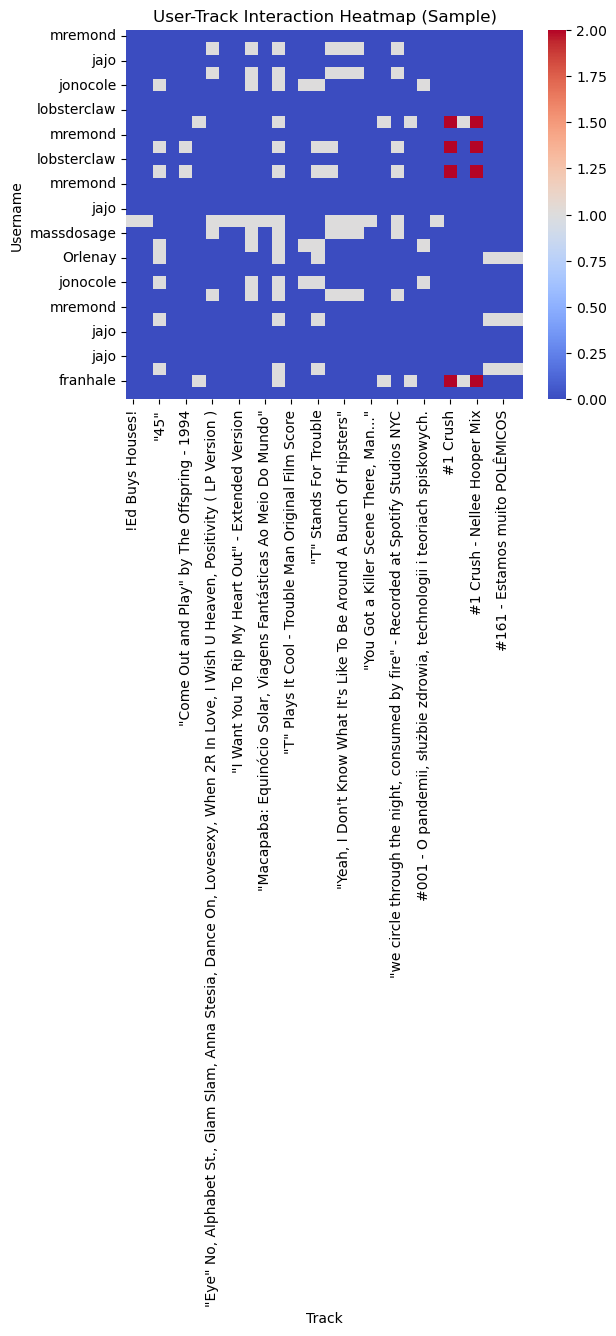

In [9]:
sampled_users = user_track_matrix.sample(30, replace=True)
sampled_tracks = user_track_matrix.columns[:30]
sns.heatmap(sampled_users[sampled_tracks], cmap='coolwarm')
plt.title('User-Track Interaction Heatmap (Sample)')
plt.show()

In [11]:
train_data, test_data = train_test_split(df_songs, test_size=0.2, random_state=42)
train_user_track_matrix = train_data.pivot_table(index='Username', columns='Track', aggfunc='size', fill_value=0)

In [13]:

knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(user_track_matrix)
distances, indices = knn.kneighbors(user_track_matrix.loc[[user]])


NameError: name 'user' is not defined

In [ ]:
# Train a KNN model to find the most similar users
knn_model = NearestNeighbors(n_neighbors=3, metric='cosine')
knn_model.fit(user_track_matrix)


def recommend_tracks(user, user_track_matrix, knn_model, top_n=5):
   
    # Check if the user exists in the user_track_matrix
    if user not in user_track_matrix.index:
        print(f"Username '{user}' not found.")
        return []

    # Reshape the target user's data to match the format required by the KNN model
    user_data = user_track_matrix.loc[[user]]  # 2D array required for kneighbors()
    
    # Get the indices and distances of the k nearest neighbors
    distances, indices = knn_model.kneighbors(user_data)
    
    # Get the usernames of the nearest neighbors (excluding the target user)
    similar_users = user_track_matrix.index[indices.flatten()]
    
    # Get the user's play history (1 = played, 0 = not played)
    user_track_history = user_track_matrix.loc[user]
    
    # Create a score for each track
    track_scores = np.zeros(len(user_track_matrix.columns))
    
    # Count how often tracks are played by similar users
    for neighbor in similar_users:
        neighbor_history = user_track_matrix.loc[neighbor]
        track_scores += neighbor_history.values  # Sum the number of times tracks were played by neighbors
    
    # Exclude tracks the user has already played
    for i, track in enumerate(user_track_matrix.columns):
        if user_track_history[track] > 0:
            track_scores[i] = 0  # Do not recommend tracks the user has already played
    
    # Rank tracks by highest score
    recommended_tracks = [track for track, score in sorted(zip(user_track_matrix.columns, track_scores), key=lambda x: -x[1])]
    
    return recommended_tracks[:top_n]


# Input from the user
user = input("Welcome!! Enter Username: ")

# Check if the user is in the matrix before proceeding
if user not in user_track_matrix.index:
    print(f"Username '{user}' not found.")
else:
    top_n = int(input("How many recommendations would you like? "))
    recommendations = recommend_tracks(user, user_track_matrix, knn_model, top_n=top_n)
    
    if recommendations:
        print(f"🎧 Recommended tracks for {user}: {recommendations}")
    else:
        print(f"No recommendations for {user}.")
